In [21]:
import cv2  
import numpy as np
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
def Canvas():
    height = 960
    width = 1280
    return np.zeros((height,width,3), np.uint8)

In [23]:
def DrawLine(img, start_point,end_point, lineThickness = 2, color=(0,255,0)):
    return cv2.line(img, start_point, end_point, color, lineThickness)

In [24]:
def DrawPoints(source, x_y, color=(0,0,255)):
    return cv2.circle(source, x_y, int(3), color,2, cv2.LINE_AA)

In [25]:
def Display(img):
    plt.figure(figsize=(15,10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [26]:
def SubPlots(img_1, img_2, title1='Image-1', title2='Image-2') : 
    f = plt.figure(figsize=(20,10))
    lp = f.add_subplot(121)
    lp.title.set_text(title1)
    rp = f.add_subplot(122)
    rp.title.set_text(title2)
    lp.imshow(img_1)
    rp.imshow(img_2)

In [27]:
def GetPoints(file):
    points = pd.read_csv(file)
    points['x'] = points['x'].astype(int)
    points['y'] = points['y'].astype(int)
    return list(zip(points.x, points.y))

In [28]:
def SplitOddEven(my_list):
    return my_list[1::2], my_list[0::2]

In [29]:
val = GetPoints("gt_points.csv")

In [30]:
val[:10]

[(817, 885),
 (671, 672),
 (671, 672),
 (628, 609),
 (628, 609),
 (611, 577),
 (611, 577),
 (606, 564),
 (606, 564),
 (606, 550)]

In [31]:
odd, even = SplitOddEven(val)
odd[:2]

[(671, 672), (628, 609)]

In [32]:
even[:2]

[(817, 885), (671, 672)]

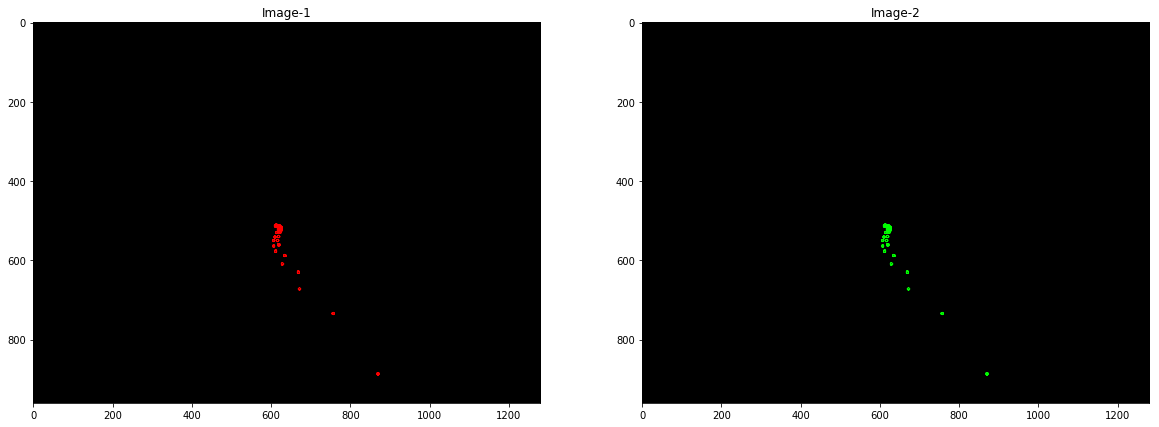

In [33]:
odd_points_image = Canvas()
for v in odd:
    odd_points_image = DrawPoints(odd_points_image, v, color=(255,0,0))

even_points_image = Canvas()
for v in odd:
    even_points_image = DrawPoints(even_points_image, v, color=(0,255, 0))

SubPlots(odd_points_image, even_points_image)

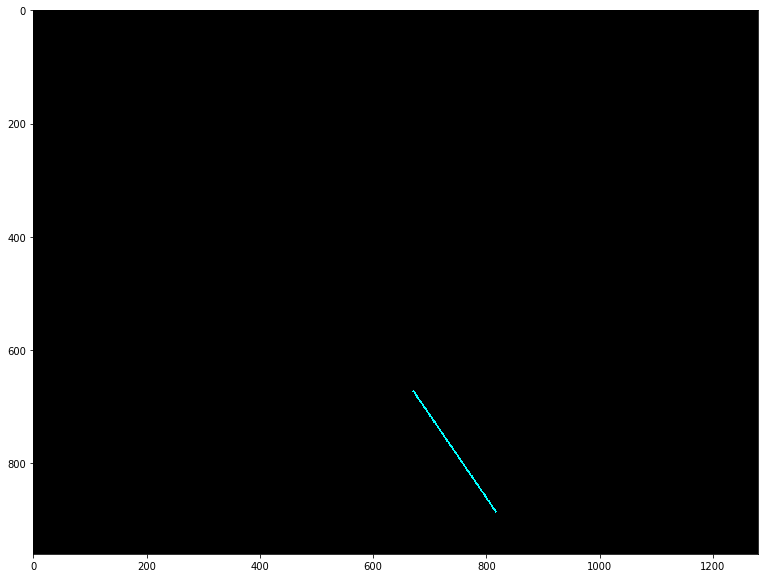

In [34]:
img = Canvas()
img = DrawLine(img, odd[0],even[0], color=(255,255,0))
Display(img)

In [62]:
ros_points = GetPoints("ros_points.csv")
ros_odd_points, ros_even_points  = SplitOddEven(ros_points)
ros_points

[(865, 888), (982, 1002), (762, 694), (820, 751), (721, 620), (758, 655)]

In [63]:
ros_odd_points[:2], ros_even_points[:2]

([(982, 1002), (820, 751)], [(865, 888), (762, 694)])

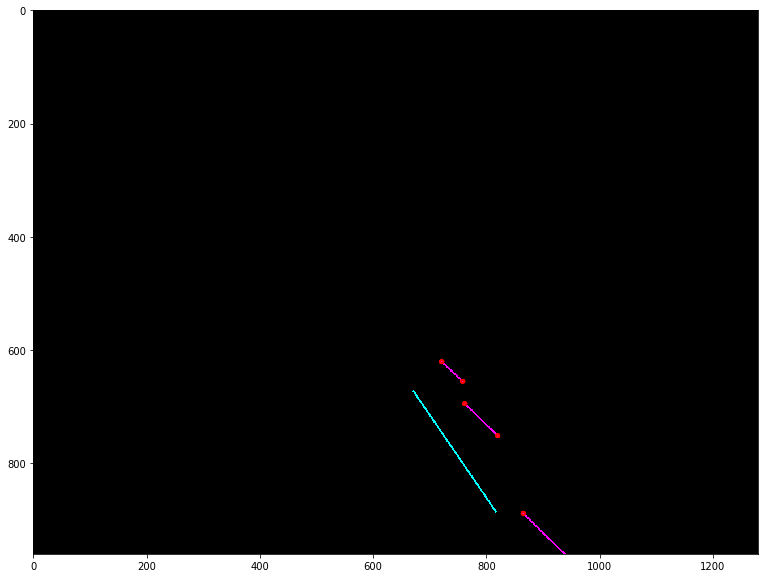

In [65]:
img = Canvas()
img = DrawLine(img, odd[0],even[0], color=(255,255,0))

img = DrawLine(img, ros_odd_points[0],ros_even_points[0], color=(255,0,255))
img = DrawLine(img, ros_odd_points[1],ros_even_points[1], color=(255,0,255))
img = DrawLine(img, ros_odd_points[2],ros_even_points[2], color=(255,0,255))

for v in ros_points:
    img = DrawPoints(img, v, color=(0,0, 255))
Display(img)

In [38]:
all_points = GetPoints("all_gt_points.csv")
all_odd_points, all_even_points  = SplitOddEven(all_points)
all_points[:5]

[(143, 872), (255, 784), (255, 784), (515, 588), (515, 588)]

In [39]:
lane_points = GetPoints("only_lanes_points.csv")
lane_odd_points, lane_even_points  = SplitOddEven(lane_points)
lane_points[:5]

[(143, 872), (255, 784), (255, 784), (515, 588), (515, 588)]

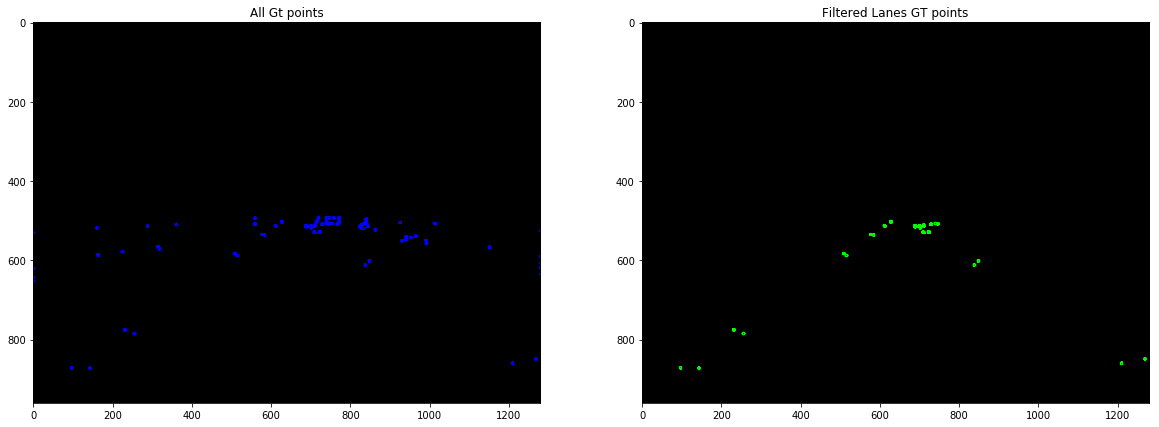

In [40]:
all_points_image = Canvas()
for v in all_points:
    all_points_image = DrawPoints(all_points_image, v, color=(0,0, 255))

lanes_points_image = Canvas()
for v in lane_points:
    lanes_points_image = DrawPoints(lanes_points_image, v, color=(0,255, 0))

SubPlots(all_points_image, lanes_points_image, title1="All Gt points", title2="Filtered Lanes GT points")

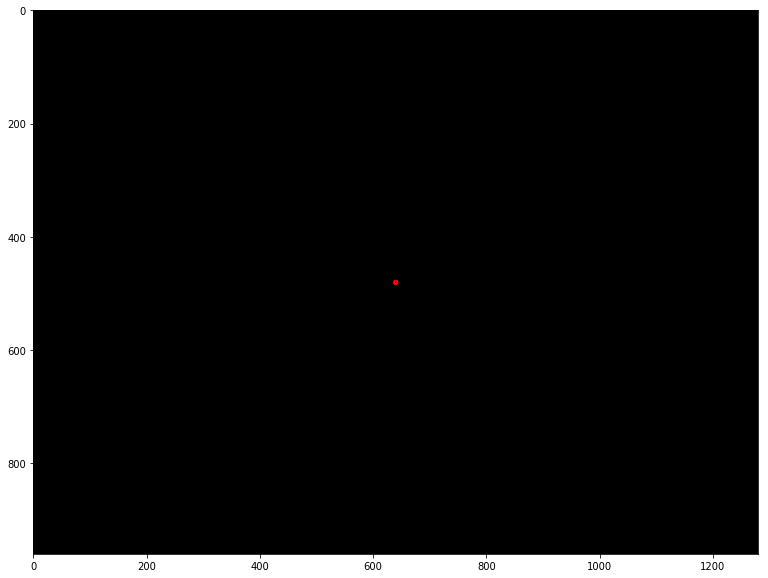

In [53]:
test_img = Canvas()
y0 = int(960/2)
x0 = int(1280/2)
DrawPoints(test_img,(x0,y0))
#DrawLine(test_img)
Display(test_img)

In [46]:
x0,y0

(480, 640)